In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("extendedData.csv").dropna()

In [3]:
data.head()

,Unnamed: 0,id,city,DOB,address,longitude,sex,state,latitude,name,...,R04.2,G47.33,R00.0,R19.7,E11.65,B20.1,M05.10,F14.121,F10.121,N18.9
0,0,1,Sanders,1996-07-08T22:11:38Z,316 CROUCH STREET,-109,F,Arizona,35,"MOS,JERN M",...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,10,Tsaile,1999-05-08T22:11:38Z,1480 E 23RD,-109,M,Arizona,36,"KLUTSCH,NELIDA Z",...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100,Quartzsite,1997-11-08T22:11:38Z,5156 N WEST,-114,M,Arizona,34,"POLITOVICH,ACHAEE A",...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1000,Santa Barbara,1998-03-08T22:11:38Z,7020 TRISTAN CIRCLE,-120,M,California,34,"FLORES RIVERA,JERUZ D",...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,10000,Buffalo,1997-10-08T22:11:38Z,3925 SACRAMENTO ST405,-107,M,Wyoming,44,"BUCKNER,SANAE",...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Convert SILVER values to ints and drop NA

# data["SILVER"] = pd.to_numeric(data["SILVER"], errors="coerce")
# for i in range(len(data[""])):
#     if np.isnan(data.iloc[i]["SILVER"]):
#         data.at[i, "SILVER"] = (data.iloc[i]["BRONZE"] + data.iloc[i]["GOLD"]) / 2
#         print(data.iloc[i]["SILVER"])
# data["SILVER"] = data["SILVER"].astype(int)

In [5]:
def tobaccoConv(x):
    if x.lower() == "yes":
        return True
    if x.lower() == "no":
        return False
    return np.nan

data["TOBACCO"] = data["TOBACCO"].apply(lambda row: tobaccoConv (row))

In [6]:
# Clean silver data of NAs

data["SILVER"] = pd.to_numeric(data["SILVER"], errors="coerce")
data["PLATINUM"] = pd.to_numeric(data["PLATINUM"], errors="coerce")
data["WEIGHT"] = pd.to_numeric(data["WEIGHT"], errors="coerce")
data["HEIGHT"] = pd.to_numeric(data["HEIGHT"], errors="coerce")

In [7]:
data = data.dropna()

In [8]:
def avgCost(x):
    return int((x["BRONZE"] + x["SILVER"] + x["GOLD"] + x["PLATINUM"]) / 4)

data["AVGCOST"] = data.apply(lambda row: avgCost(row), axis=1)

In [9]:
def riskCounter(x):
    return int(x["B20.1"] + x["E11.65"] + x["F10.121"] + x["F14.121"] + \
        x["G47.33"] + x["G80.4"] + x["M05.10"] + x["N18.9"] + \
        x["R00.0"] + x["R00.8"] + x["R04.2"] + x["R19.7"] + \
        x["S62.308"] + x["T84.011"] + x["T85.622"] + x["Z91.010"])

data["RISK_FACTOR"] = data.apply(lambda row: riskCounter(row), axis=1)

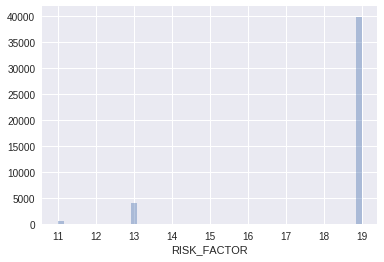

In [10]:
sns.distplot(data["RISK_FACTOR"], kde=False)

# Bronze

(0, 150)

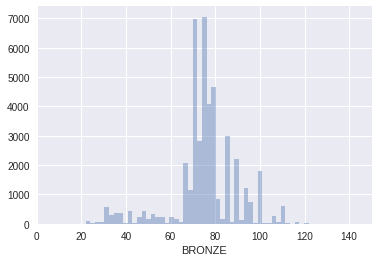

In [11]:
sns.distplot(data["BRONZE"], kde=False)
sns.plt.xlim(0, 150)

(0, 200)

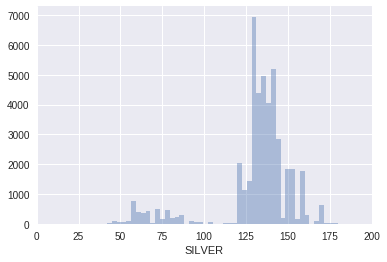

In [12]:
sns.distplot(data["SILVER"], kde=False)
sns.plt.xlim(0, 200)

(0, 300)

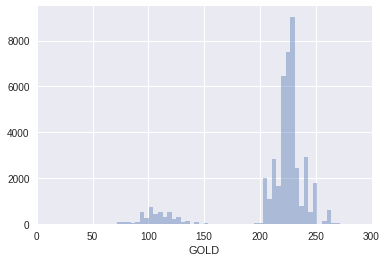

In [13]:
sns.distplot(data["GOLD"], kde=False)
sns.plt.xlim(0, 300)

(0, 450)

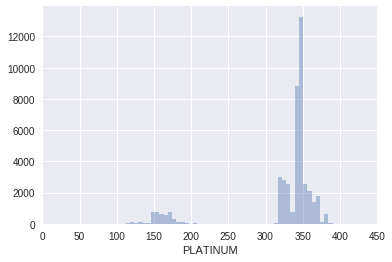

In [14]:
sns.distplot(data["PLATINUM"], kde=False)
sns.plt.xlim(0, 450)

(0, 250)

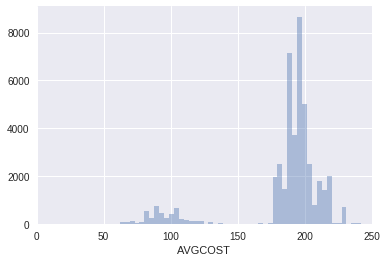

In [15]:
sns.distplot(data["AVGCOST"], kde=False)
sns.plt.xlim(0, 250)

(0, 420)

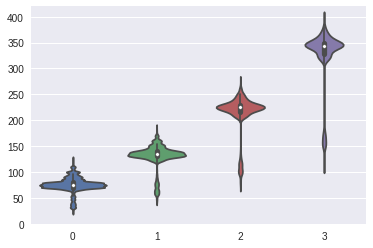

In [16]:
sns.violinplot(data=[data["BRONZE"], data["SILVER"], data["GOLD"], data["PLATINUM"]])
sns.plt.ylim(0, 420)

In [44]:
low_gold = data.loc[data["GOLD"] < 175]
high_gold = data.loc[data["GOLD"] >= 175]

(1000000, 1050000)

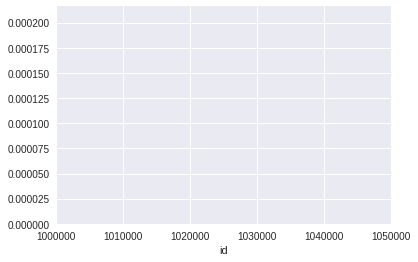

In [51]:
sns.distplot(low_gold["id"])
sns.plt.xlim(1000000, 1050000)

(1000000, 1050000)

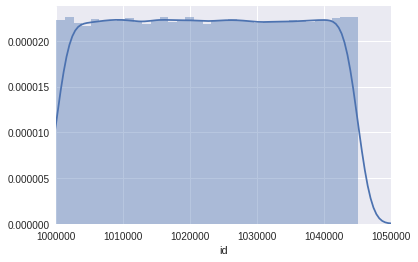

In [52]:
sns.distplot(high_gold["id"])
sns.plt.xlim(1000000, 1050000)

In [18]:
sample = data.sample(n=1000)

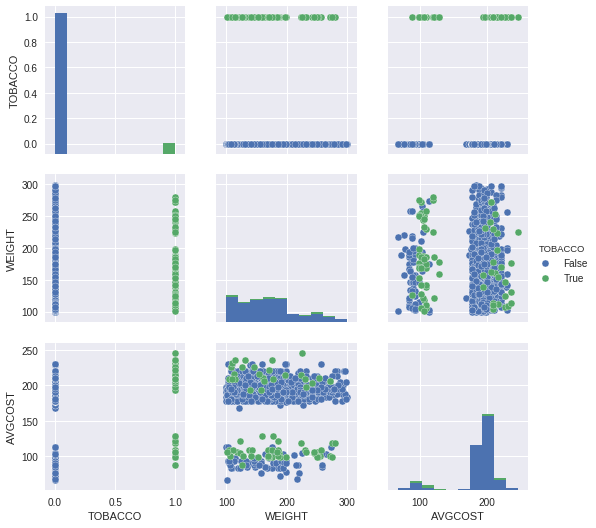

In [19]:
sns.pairplot(sample[["TOBACCO", "WEIGHT", "AVGCOST"]], hue="TOBACCO")

In [60]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

In [61]:
names = ["XGBoost", 
    "Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [62]:
classifiers = [
    XGBClassifier(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [63]:
purDict = {"Bronze": 0}

In [64]:
classSamples = data.sample(n=5000)

In [65]:
import warnings
warnings.filterwarnings('ignore')
X = classSamples[["HEIGHT", "WEIGHT", "TOBACCO", "BRONZE", "SILVER", "GOLD", "PLATINUM"]]
y = classSamples["PURCHASED"]

le = LabelEncoder()
# for column in X:
#     X[column] = le.fit_transform(X[column])
#     X[column] = StandardScaler().fit_transform(X[column])
X["TOBACCO"] = le.fit_transform(X["TOBACCO"])
#X[:100]

# for i, val in enumerate(y):
#     if y[i] == "Bronze":

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

In [67]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("{}: {}".format(name, score))

XGBoost: 0.4
Nearest Neighbors: 0.294
Linear SVM: 0.401
RBF SVM: 0.403
Decision Tree: 0.4
Random Forest: 0.406
Neural Net: 0.318
AdaBoost: 0.395
Naive Bayes: 0.334
QDA: 0.312


In [68]:
from sklearn import linear_model

In [29]:
import warnings
warnings.filterwarnings('ignore')
X_reg = classSamples[["HEIGHT", "WEIGHT", "TOBACCO"]]
y_reg = classSamples["AVGCOST"]

X_reg["TOBACCO"] = le.fit_transform(X_reg["TOBACCO"])

In [30]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X_reg, y_reg, test_size=0.2, random_state=42)

In [31]:
reg = linear_model.LinearRegression()
reg.fit(X_train_reg, y_train_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
predictions = reg.predict(X_test_reg)
errors = abs(predictions - y_test_reg.values)

In [33]:
print("Mean error:", np.mean(errors))
print("Error stddev:", np.std(errors))

Mean error: 17.433746319
Error stddev: 25.0444735479


In [34]:
import tensorflow as tf
import tflearn

In [35]:
inp = tflearn.input_data(shape=[None, 3])

net = tflearn.fully_connected(inp, 64, activation="relu")
net = tflearn.fully_connected(net, 64, activation="relu")
net = tflearn.fully_connected(net, 32, activation="relu")
net = tflearn.fully_connected(net, 1, activation="relu")
net = tflearn.regression(net)

model = tflearn.DNN(net)

In [36]:
xvals = X_train_reg.values
yvals = y_train_reg.values.reshape([-1, 1])

In [40]:
yvals

array([[214],
       [190],
       [198],
       ..., 
       [193],
       [198],
       [220]])

In [37]:
model.fit(xvals, yvals)

Training Step: 629  | time: 0.225s
| Adam | epoch: 010 | loss: 0.00000 -- iter: 3968/4000
Training Step: 630  | time: 0.228s
| Adam | epoch: 010 | loss: 0.00000 -- iter: 4000/4000
--


In [38]:
model.predict(X_test_reg[:5])

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]], dtype=float32)

In [39]:
y_test_reg

16634    220
24564    195
13511    200
37816    190
4209     195
32504    210
7282     193
35007    190
10521    190
29588    201
35071    195
17094    198
4873     188
16133    190
9299     220
47720    220
7498     198
28681    106
30919    205
49479    178
32177    186
2753     205
1920     213
2612     216
44006    200
39136    205
19515    190
36282    190
41279    200
4311     195
        ... 
13831    200
24466    205
1443     188
28822    195
41728    190
22740    185
45856    198
16053    190
22756    193
41909    210
29840    180
19981    218
31285    203
16303    105
12209    193
4414      83
25520    224
3846     186
43173    195
11755    178
7424     200
40933    213
10883    200
34558    190
45868    198
46411    195
30064    178
2132     195
37542    193
29866    193
Name: AVGCOST, Length: 1000, dtype: int64